In [1]:
import numpy as np
from matplotlib import pyplot as plt

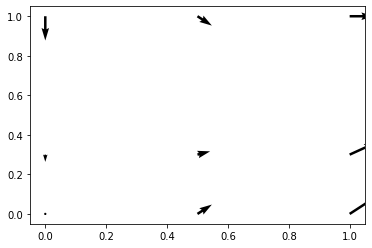

In [2]:
x = [0,0.5,1]
y = [0,0.3,1]
X,Y = np.meshgrid(x,y)
X

fig, ax = plt.subplots()
ax.quiver(X,Y,X,X-Y, angles = 'xy')

FEUILLE DE TP 1

# Modèles pour la dynamique des populations

Dans ce TP nous nous intéressons à différents modèles continus et discrets pour la dynamique des populations. 
Nous allons notamment visualiser les solutions pour différents jeux de paramètres et les interpréter.

Dans un __modèle continu__, on désigne par $N(t)$ la population d'une espèce animale donnée à l'instant $t$. Cette quantité est supposée être une fonction régulière de la variable temps $t$.

Dans les modèles continus que nous allons considérer, la loi d'évolution de la population est décrite par une équation différentielle qui exprime une __loi de conservation__ :

$$
N′(t)= n(t) − d(t) + m(t).
$$

où
* $n(t)$ est le taux de naissances à l'instant $t$ ;
* $d(t)$ est le taux de décès à l'instant $t$ ;
* $m(t)$ est le taux de migration (arrivées $-$ départs) dans la population à l'instant $t$.

Le processus dit de modélisation consiste à donner un sens au second membre de l'équation précédente.



On obtient alors un __problème de Cauchy__ de la forme

$$
\left\lbrace
\begin{aligned}
&y'(t) = f(t, y(t)), &&t>0,\\
&y(0) = y_0.
\end{aligned}
\right.
$$

Dans le cas où la fonction $f$ est suffisamment régulière (par exemple $C^1$ et à dérivées bornées), le théorème de 
_Cauchy-Lipschitz_ assure l'existence et l'unicité de la solution.

Dans un __modèle en temps discret__, le temps est en général exprimé en nombre de générations ou il décrit un aspect périodique de la loi de reproduction (saisons, années,...). Il peut aussi, dans certains cas, correspondre simplement à une discrétisation du temps continu. 

On considère une population d'individus notée $N\in\mathbb{N}$ (les individus sont indivisibles) qui évolue d'une génération (ou d'une heure, année...) $n$ à $n+1$. L'évolution de la population est donc définie par une suite discrète.

La variation du nombre d'individus entre $n$ et $n+1$ peut alors être décomposée sous la forme suivante :

$$ N_{n+1} - N_n = n - d + m.$$

où
* $n$ est le nombre de naissance entre $n$ et $n+1$ ;
* $d$ est le nombre de mort entre entre $n$ et $n+1$ ;
* $m$ est la différence entre le nombre d'individus qui migrent et ceux qui émigrent dans la population entre $n$ et $n+1$.

In [3]:
%matplotlib notebook
viewer = 'matplotlib'

### Préambule: courbes paramétrées

On demande de tracer quelques courbes paramétrées $M(t)=(x(t), y(t))$ et d'indiquer sur le dessin quelques vecteurs vitesse. On pourra commencer par $M(t)=(cos(t), sin(t))$, puis chercher de jolies courbes sur le web.
A titre d'exemple, voici un code permettant de tracer la courbe $M(t)=(t^2, t^3-3t)$.

<IPython.core.display.Javascript object>


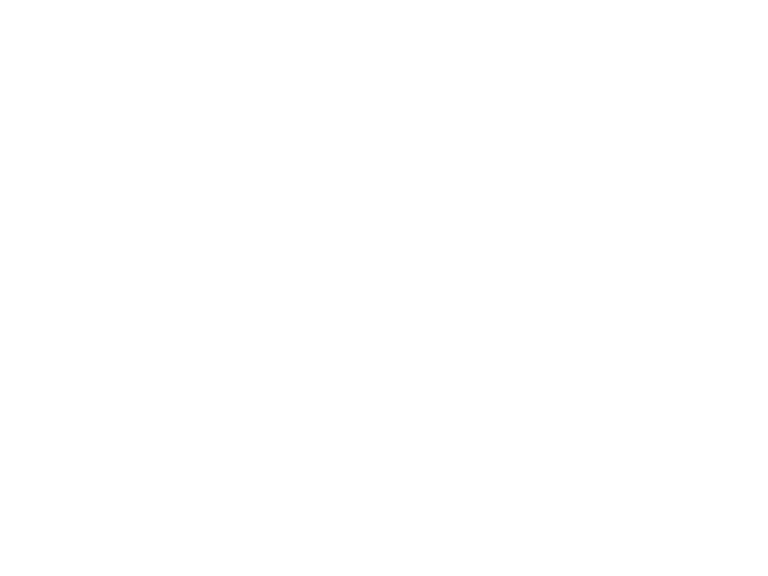

In [4]:
fig,ax = plt.subplots()
t = np.linspace(0., 4. * np.pi)
def x(t):
    return np.cos(t)
def y(t):
    return np.sin(t)+t*0.5
ax.plot(x(t),y(t))

<IPython.core.display.Javascript object>


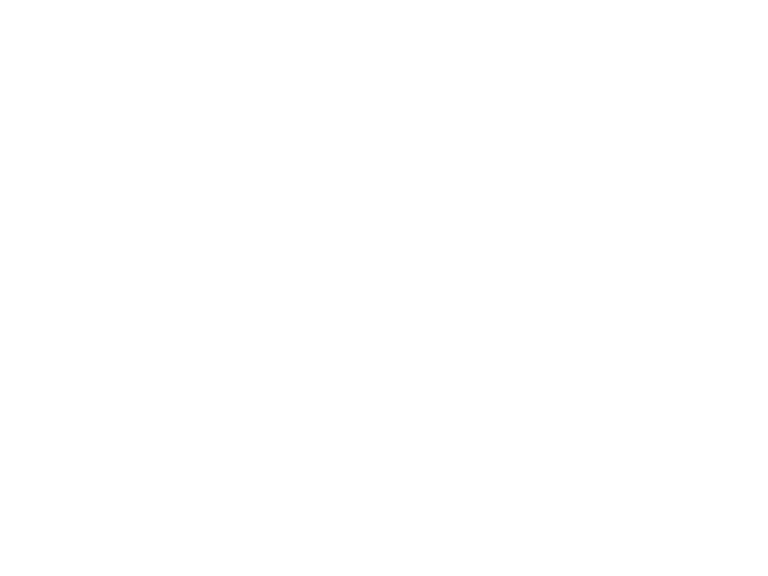

In [5]:

fig, ax = plt.subplots()

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))


t = np.linspace(-3, 3, 100)

def x(t):
    return t**2

def y(t):
    return t**3 - 3 * t

ax.set_xlim(-1, 6)
ax.set_ylim(-3, 3)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.plot(x(t), y(t), linewidth=1.5)

A = [x(-1), y(-1)]

ax.scatter(A[0], A[1], 50, color='red')

ax.annotate(
    r'$M(-1)$',
    xy=(1, 2),
    xycoords='data',
    xytext=(1, 2.2),
    color='blue',
)

ax.annotate(
    'M\'(-1)',
    xy=(.3, 2),
    xycoords='data',
    xytext=(.3, 2.1),
    color='red',
)

ax.arrow(1, 2, -1, 0, color='red', width=0.05)

plt.show()


### Le modèle de Malthus

<table style="width:100%">
    <tr>
        <td style="text-align:justify">
            Thomas-Robert Malthus_ est né le 14 Février 1766 à Roockery, petit village du Sud-est de l'Angleterre, dans le comté de Surrey.
            <br>
            Après des études primaires mouvementées et sept années passées au Jésus Collège de Cambridge, Thomas-Robert Malthus obtient le diplôme de « Master of Arts ». Il reste encore trois ans dans son institution, comme professeur. C'est à ce moment qu'il envisage d'embrasser la carrière ecclésiastique. En 1796, âgé de trente ans, il entre dans l'Église anglicane et est nommé vicaire d'Albury, petite paroisse du Surrey, toute proche de la maison paternelle.
            <br>
            Un jour de 1798, enfin, à la suite d'une discussion animée avec son père - homme enthousiaste et fumeux, admirateur des philosophes utopistes et infiniment plus illuminé que son fils - il prend la plume: en quelques jours, tout d'une traite, il couche sur le papier la théorie originale qui constitue sa grande contribution à l'histoire des idées sociales: _l'absence de parallélisme entre l'accroissement spontané des espèces vivantes et les moyens de subsistance, l'équilibre ne pouvant être maintenu que par le jeu constant de la concurrence vitale et des actions de mort_ :
            <br>
            « Dans le règne végétal et dans le règne animal, la nature a répandu d'une main libérale, prodigue, les germes de vie. Mais, en comparaison, elle a été avare de place et de nourriture. S'ils avaient assez d'aliments et de surface pour se développer librement, les germes d'existence contenus dans notre petit bout de terre suffiraient pour remplir des millions de mondes en l'espace de seulement quelques milliers d'années. Mais la Nécessité, cette loi impérieuse et tyrannique de la nature, les cantonne dans les bornes prescrites. Le règne végétal et le règne animal doivent se restreindre pour ne pas excéder ces limites. Même la race humaine, malgré tous les efforts de sa Raison, ne peut échapper à cette loi. Dans le monde des végétaux et des animaux, celle-ci agit en gaspillant les germes et en répandant la maladie et la mort prématurée: chez l'homme, elle agit par la misère et par le vice ».
        </td>
        <td width="25%">
            <img src="images/Thomas_Malthus.jpg", width='100%'>
        </td>
    </tr>
</table>  

#### Description du modèle de Malthus

Le __modèle de Malthus__ stipule qu'il n'y a pas de migration et que les naissances ainsi que les décès sont proportionnels à la valeur de la population à l'instant considéré.
On écrit alors l'équation sous la forme

$$ N'(t) = \lambda N(t) - \mu N(t) = rN(t),$$

où $\lambda$ et $\mu$ désignent deux constantes réelles positives, le taux de naissances et le taux de décès par individu, et $r=\lambda - \mu$. 

Cette équation différentielle peut être associée à une donnée initiale $N(0)=N_0$.

La solution du problème de Cauchy associé est simple : 

$$ N(t) = N_0 \text{e}^{r t}, \qquad t\geq0.$$

Le __modèle de Malthus__ peut être vu comme une limite du __modèle de croissance exponentielle__ 
lorsque le pas de temps $\Delta t$ tend vers $0$. Nous essayerons dans ce cours de définir les 
notions nécessaires à la démonstration et à la compréhension de ce résultat.

#### Représentation de la solution du modèle de Malthus

<IPython.core.display.Javascript object>


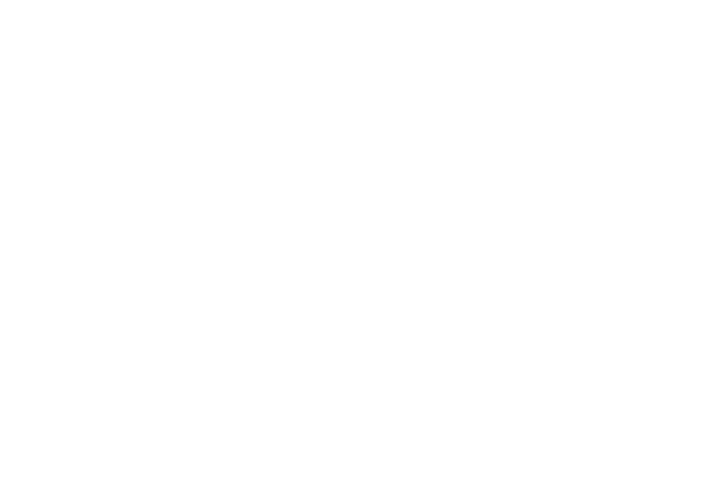

In [6]:
from lib.dynamique_des_populations import Malthus
Malthus.interactive_plot(viewer = viewer)

#### CHAMP DE VECTEURS D'UNE EDO
$\newcommand{\R}{{\mathbb R}}$

Soit $f:\R \times \R\longrightarrow \R$ une fonction de classe $C^1$ et considérons l'équation différentielle

$$
(E)\ \ \ \ \ \ \ y'(t)=f(t,y(t)).
$$

On remarque que la fonction $y$ est une solution de l'équation si et seulement si le vecteur vitesse de la courbe paramétrée $M:t\mapsto (t, y(t)$ au point $M(t_0)$ est $M'(t_0) = (1,f(t_0,y(t_0)))$. La définition qui suit est dessous est donc naturelle.

On appelle __champ de vecteurs__ associé à $(E)$ l'application de $\R^2$ dans $\R^2$ définie par
$$
V(t,y)=\big(1,f(t,y)\Big).
$$

On représente le champ de vecteurs $V$ en un point $P=(t_0,y_0)$ du plan par une flèche correspondant au segment $[P,P+\varepsilon V(P)]$, avec $\varepsilon$ suffisament petit pour que le dessin reste lisible, partant de $P$ et pointant vers $P+\varepsilon V(P)$.


#### QUESTION 1

Représenter dans un graphe le champ de vecteurs associé à l'équation différentielle du modèle de Malthus pour $r=2$.

Superposer à ce graphe plusieurs solutions pour des données initiales différentes.

Pensez à rajouter des légendes, des labels pour les axes et un titre à votre graphique.



<IPython.core.display.Javascript object>


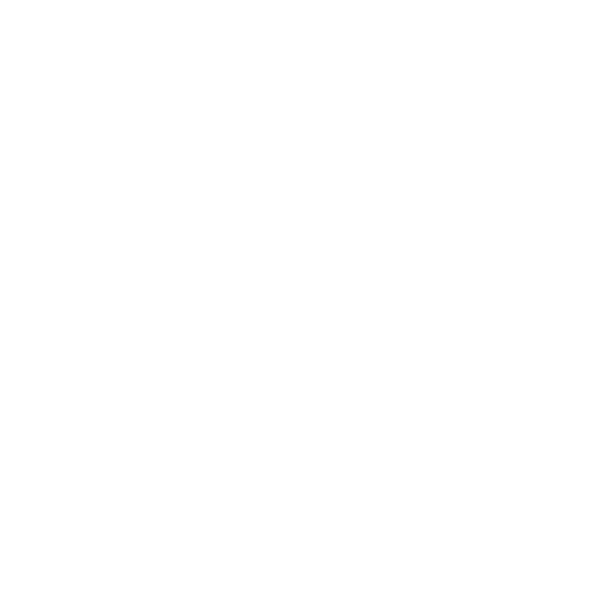

No handles with labels found to put in legend.


In [7]:
# COMPLETER LE CODE SUIVANT

import numpy as np
import matplotlib.pyplot as plt

rr = 0.8
N_0 = 0.5;

def f(t,y):
    return rr * y;

def N(t,y0):
    return y0 * np.exp(rr * t);

# Commandes pour tracer le champs de vecteur

t=np.linspace(0,5,15)
y=np.linspace(0,N(t[-1],N_0),15)

T,Y=np.meshgrid(t,y)

U = np.ones(T.shape)/np.sqrt(1+f(T,Y)**2)
V = f(T,Y)/np.sqrt(1+f(T,Y)**2)

fig, ax = plt.subplots(figsize = (5,5))
ax.quiver(T,Y,U,V,angles='xy')

# Superposer les solutions de l'EDO
ax.plot(t,N(t,N_0))

plt.title('vector field and example curves of malthusian model')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()

### Le modèle de Verhulst

<table style="width:100%">
    <tr>
        <td style="text-align:justify">
            _Pierre-François Verhulst_ (né à Bruxelles le 28 octobre 1804 - mort le 15 février 1849 dans cette même ville) est un mathématicien belge. Inspiré par l' « Essai sur le principe de population » de _Thomas Malthus_, il proposa en 1838 le modèle de Verhulst, décrivant l'évolution des populations animales grâce à un modèle qui ne soit pas exponentiel. C'est dans la publication de 1845 qu'il nomme cette courbe « logistique » sans donner l'explication de ce terme.
            <br>
            Verhulst étudia les mathématiques sous la direction de Quetelet à l'Athénée royal de Bruxelles puis à l'université de Gand. À vingt ans, il remporta le prix scientifique de l'Université de Leyde pour un mémoire sur \og le problème des maxima et minima \fg, puis l'année suivante le prix de la Faculté des Sciences de Gand pour un mémoire sur le calcul des variations. Sa thèse, soutenue en 1825, portait sur la résolution des équations binomiales.
            <br>
            Il retrouva ensuite son maître Quetelet qui l'invita à appliquer ses connaissances mathématiques aux statistiques et à la démographie. Atteint de tuberculose, il partit en convalescence dans les États Pontificaux en 1830. Il donnait quelques conférences au Musée des Sciences de Bruxelles lorsqu'en 1834 il obtint la chaire d’analyse mathématique de l'École royale militaire de Belgique. Cette position financière stable lui permit de s'attaquer à la rédaction d'un Traité des fonctions elliptiques qui ferait la synthèse des recherches menées depuis cinquante ans par Legendre, Abel et Jacobi. L'ouvrage, paru en 1841, fut suivi de son élection à l'Académie des Sciences de Belgique.
        </td>
        <td width="25%">
            <img src="images/Pierre_Francois_Verhulst.jpg", width='100%'>
        </td>
    </tr>
</table>   

#### Description du modèle de Verhulst

Le __modèle de Verhulst__ est un modèle de croissance proposé par _Pierre François Verhulst_ en 1838 en réponse au modèle de Malthus.

Dans ce modèle, le taux de natalité et le taux de mortalité sont des fonctions affines respectivement décroissante et croissante de la taille de la population. Autrement dit, plus la taille de la population augmente, plus son taux de natalité diminue et son taux de mortalité augmente. Verhulst pose d'autre part que, lorsque les populations sont de petites tailles, elles ont tendance à croître.
Ce modèle conduit, en temps continu, à une fonction logistique.

On écrit l'équation de ce modèle sous la forme

$$ N'(t) = r \; N(t) \Bigl( 1 - \frac{N(t)}{K} \Bigr),$$

où $r$ et $K$ sont deux constantes strictement positives : $r$ est le taux de croissance (naissance - mort) et $K$ est la _charge utile_ de l'environnement ou _capacité biotique_. Cette charge utile $K$ dépend de la capacité du milieu en nourriture de soutien.

Cette équation différentielle peut être associée à une donnée initiale $N(0)=N_0$.

La solution du problème de Cauchy associé est 

$$
N(t) = \frac{K}{1 + \bigl(\frac{K}{N_0}-1\bigr) \text{e}^{-rt}}, \qquad t\geq0. 
$$

Le __modèle de Verhulst__ peut être vu comme une limite du __modèle de croissance logistique__ 
lorsque le pas de temps $\Delta t$ tend vers $0$. Nous essayerons dans ce cours de définir 
les notions nécessaires à la démonstration et à la compréhension de ce résultat.

#### Représentation de la solution du modèle de Verhulst

<IPython.core.display.Javascript object>


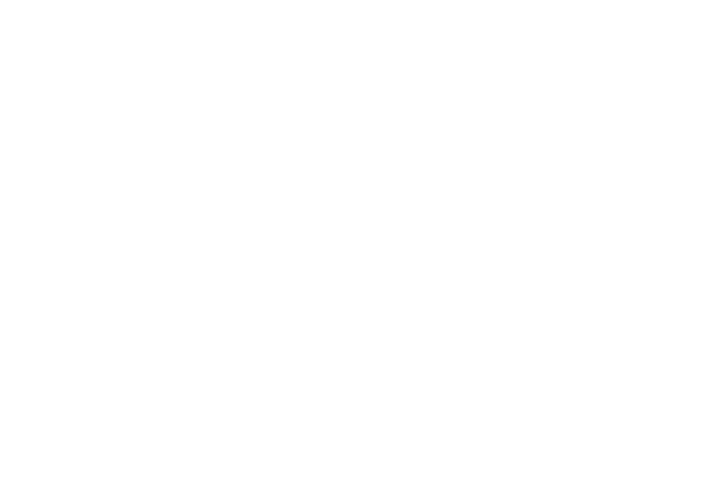

In [8]:
from lib.dynamique_des_populations import Verhulst
Verhulst.interactive_plot(viewer = viewer)

#### QUESTION 2

On fixe les paramètres $r=8$ et $K=2$. Représenter dans le plan $(t,N)$ le champ de vecteurs associé à l'équation différentielle sur $N$.

Superposer les graphes de plusieures solutions pour des données initiales différentes.


<IPython.core.display.Javascript object>


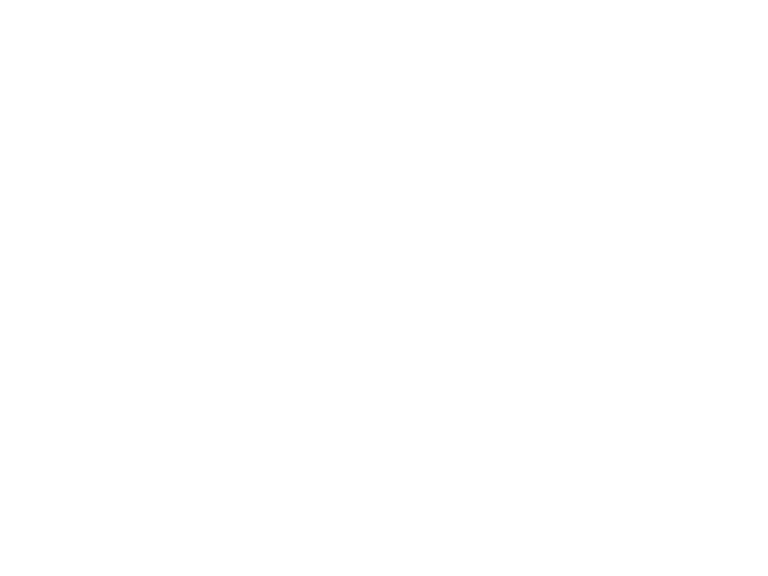

No handles with labels found to put in legend.


In [9]:
# COMPLETER LE CODE SUIVANT

import numpy as np
import matplotlib.pyplot as plt

rr = 1.5
N_0 = 0.1
K = 10
def f(t,y):
    return rr * (1 - y/K) * y;

def N(t,y0):
    return K /(1+(K/y0 - 1) * np.exp(-rr * t));

# Commandes pour tracer le champs de vecteur

t=np.linspace(0,5,15)
y=np.linspace(N(t[0],N_0),N(t[-1],N_0),15)

T,Y=np.meshgrid(t,y)

U = np.ones(T.shape)/np.sqrt(1+f(T,Y)**2)
V = f(T,Y)/np.sqrt(1+f(T,Y)**2)

fig, ax = plt.subplots()
ax.quiver(T,Y,U,V,angles='xy')

# Superposer les solutions de l'EDO
ax.plot(t,N(t,N_0))

plt.title('vector field and example curves of Verhulst model')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()

## Résolution approchée

Afin de calculer une solution approchée d'un problème de Cauchy, nous pouvons utiliser différents schémas numériques. Nous verrons ultérieurement comment les construire et étudier leurs propriétés.

D'une manière générale, la résolution numérique d'une équation différentielle commence par le choix d'un pas de temps $\Delta t>0$. On chercher ensuite à calculer une solution approchée aux instants $t^n = n\Delta t$, notée $y^n$ :
$$ y^n \simeq y(t^n).$$

On attend d'un schéma numérique pour la résolution d'un problème de Cauchy qu'il soit convergent, c'est-à-dire que la solution approchée converge vers la solution exacte du problème lorsque le pas de temps $\Delta t$ tend vers $0$.

### Résolution numérique du problème de Cauchy avec la méthode `odeint`

Le méthode `odeint` du package `scipy.integrate` permet de calculer rapidement et aisément une solution approchée d'un problème de Cauchy de la forme :

$$
\left\lbrace
\begin{aligned}
&y'(t) = f(t, y(t)), &&t>0,\\
&y(0) = y_0.
\end{aligned}
\right.
$$

Voir par exemple :
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html.

Essayons de l'utiliser. Nous commençons par charger tous les packages nécessaires.

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np                       # pour les numpy array
from scipy.integrate import odeint       # seulement odeint
import matplotlib.pyplot as plt          # librairie graphique

#### QUESTION 3

Afin d'appliquer la méthode à la résolution du problème de Cauchy qui nous intéresse, définissez la fonction second membre (attention à l'ordre des arguments) :

$$ f(t,y) = r \; y \Bigl( 1 - \frac{y}{K} \Bigr).$$


In [11]:
rr = 2
K =10
def f (y,t):
    return rr * y * (1-y/K)

#### QUESTION 4

Choisissez un pas de temps $\Delta t$, un temps final $T_f$ (qui devrait normalement être un multiple de $\Delta t$) et construisez le vecteur $t = (t^0,\ldots,t^N)$ des temps discrets où la solution approchée sera calculée.

Choisissez également une donnée initiale $N_0$.

In [12]:
# ECRIRE LE CODE CORRESPONDANT
N_0 = 0.1
dt = 0.1
Tf = 10
t = np.arange(0, Tf, dt)


#### QUESTION 5

Construisez la solution approchée à l'aide de la fonction `odeint` et tracez la ainsi que la solution exacte dans une fenêtre graphique. 

Pour le tracé, choisissez des symboles (un carré et un cercle par exemple) afin de représenter la solution seulement aux points où elle est calculée : l'interpolation linéaire qui est faite ensuite entre les points n'a rien à voir avec la méthode numérique utilisée.

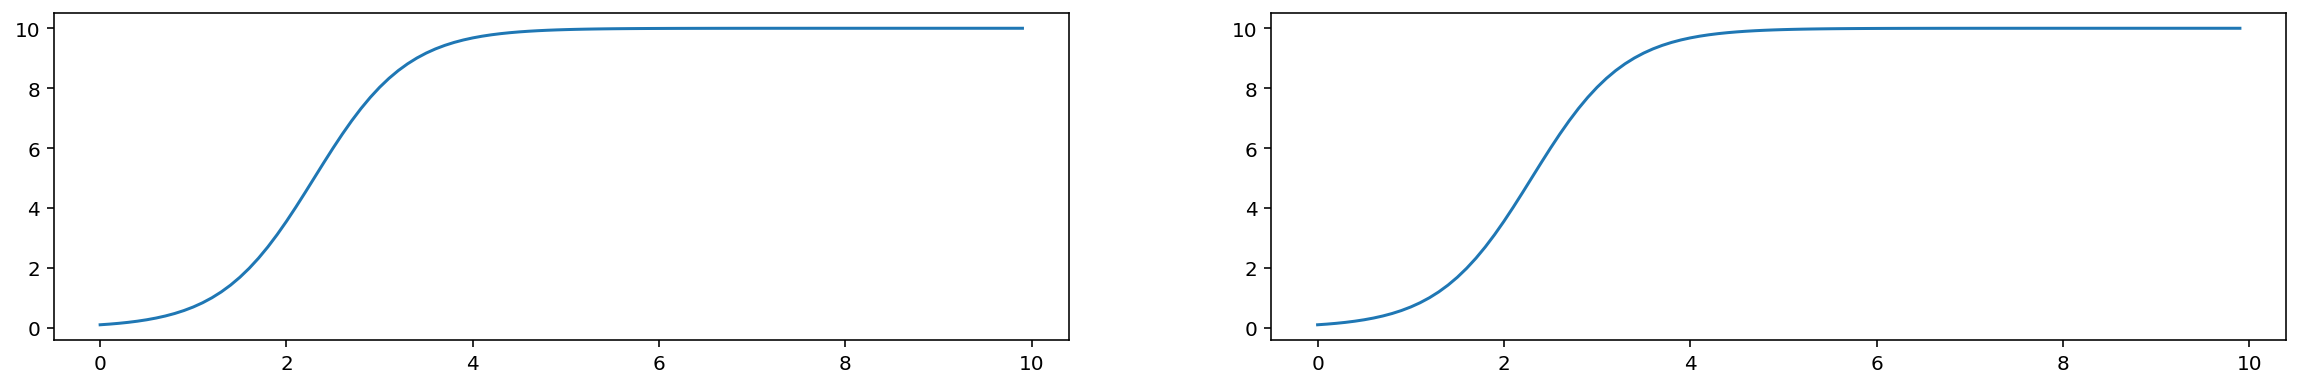

In [13]:
fig,ax = plt.subplots(1,2,figsize = (20,3))

ax[0].plot(t,odeint(f,N_0,t))
ax[1].plot(t, K /(1+(K/N_0 - 1) * np.exp(-rr * t)))

## Un modèle plus complexe

Il est possible de modifier ce modèle académique afin de prendre en compte des effets du milieu. Prenons l'exemple d'une population d'insectes dont le taux de croissance est élevé pour qui le milieu (ici seulement pris en compte au travers de la capacité biotique) a des propriétés qui varient périodiquement. Nous pouvons penser par exemple au cycle des saisons avec une variation périodique de la température, de la luminosité, de la quantité de végétation disponible...

Nous cherchons donc à résoudre le problème suivant
$$ N'(t) = r \; N(t) \Bigl( 1 - \frac{N(t)}{K(t)} \Bigr),$$
avec
$$K(t) =\frac{\overline{K}+\underline{K}}{2} + \frac{\overline{K}-\underline{K}}{2}\cos(\omega t).$$

#### QUESTION 6
Construire la solution approchée de ce problème à l'aide de la fonction `odeint` et la tracer. On pourra prendre les valeurs suivantes des paramètres : 
$r=2$, $\overline{K}= 1.8$, $\underline{K}=0.7$, $\omega=1$. 

Faites varier les valeurs de ces paramètres et commenter les résultats obtenus.

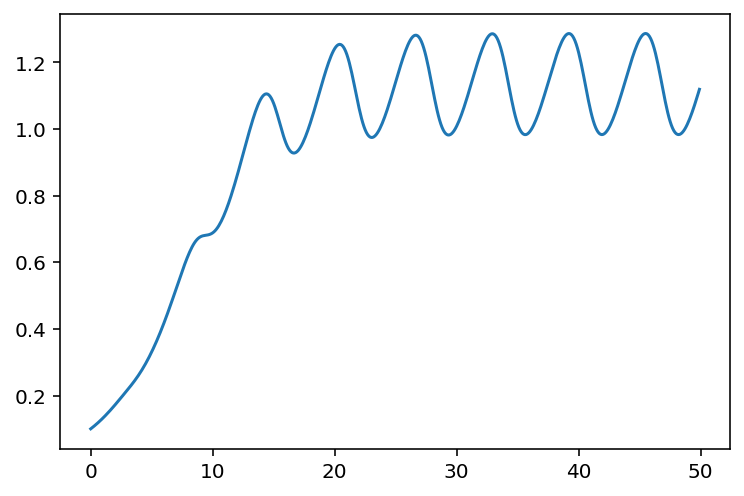

In [14]:
Kmax = 1.8
Kmin = 0.7
om = 1.

rr = 0.3

def k(t):
    return 0.5*(Kmax + Kmin + (Kmax - Kmin) * np.cos(om*t))
def f(y,t):
    return rr * y * (1 - y / k(t))
# ECRIRE LE CODE CORRESPONDANT
N_0 = 0.1
dt = 0.1
Tf = 50
t = np.arange(0, Tf, dt)

plt.plot(t,odeint(f,N_0,t))

## Un modèle discret

### Modèle de croissance logistique

Le modèle de Verhulst peut être considéré sous une forme discrète en temps. L'effectif de la population est alors modélisé par la suite logistique : le solde migratoire est toujours supposé nul ($m=0$) et 

$$ 
n - d = r \, \Delta t \, N \Bigl( 1 - \frac{N}{K} \Bigr),
$$

où $K$ est la capacité biotique et $r$ le taux de croissance de la population. 

L'évolution de la population est définie par la suite discrète :

$$ 
N_{n+1} \ = \ N_n  + r \, N_n (1- \frac{N_n}{K}) \ ,$$

pour $N_0\ge0$ donné.


#### Etude numérique du modèle de croissance logistique discret

En posant $\mu=r+1$ et $u_{n}=\frac{r}{\mu K} \ N_{n}$, on se ramène à la suite récurrente 

$$
u_{n+1}=f_{\mu}(u_{n}),
$$ 
où

$$
f_{\mu}(x) \ = \ \mu \, x \, (1-x) \ .
$$

Cela nous ramène à l'étude du comportement de la suite $(u_{n})$ pour $\mu \in \, ]1,4]$.

#### QUESTION 7

Posons 

$$l=\frac{\mu-1}{\mu} \, .$$

Vérifier que $u_{n} = l$ correspond à $N_{n}=K$.

Nous supposerons que $u_{0} \in \, ]0,1]$, de sorte que la donnée initiale $N_{0}$ soit non nulle et $N_{n}\ge0$ pour $n>0$.

un = l => un+1 = mu * ((mu - 1) /mu ) * (1 - (mu-1)/mu)

 = (mu - 1) * ( 1/ mu)
 
 = (mu-1)/mu
 
 =un
 
 donc un (un) reste constant, non nul car mu > 1.
 
 Or le seul cas où la solution reste constante non nulle, c'est celui où pour tout entier n, N0 = K = Nn (car f'(t,K) = K.)


#### QUESTION 8

Observer le comportement asymptotique de la suite $(u_n)$ pour $\mu=2.5$ et pour plusieurs valeurs différentes de la donnée initiale $u_0$. Afficher sur le même graphique les valeurs de $u_{n}$ en fonction de $n$ (pour $n$ variant entre $0$ et $40$) pour chacune des différentes données initales. Recommencer pour d'autres valeurs de $\mu$ inférieures ou égales à $3$. Attention à bien adapter le nombre d'itérations à effectuer et à visualiser, afin d'observer correctement le comportement asymptotique de la suite. Conclure. 


In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
mu = 2.8

t = np.linspace(0,1,40)
def un(x):
    return mu * x * (1 - x)

def recPlot(f,t,u0):
    n = len(t)
    i=1
    
    res = np.zeros(n)
    res[0] = u0
    while i < n:
        res[i] = f(res[i-1])
        i+=1
    return res
i = 0
plt.plot(t,recPlot(un,t,0.5))

#### QUESTION 9

Faire de meme pour des valeurs de $\mu$ strictement comprises entre $3$ et $3.449$. Conclure.


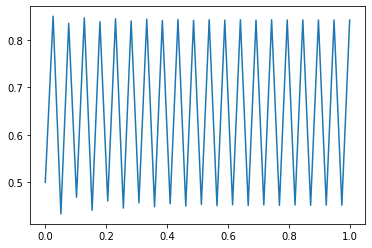

In [2]:
import math
mu = 3.4
plt.plot(t,recPlot(un,t,0.5))

#### QUESTION 10

Faire de même pour des valeurs de $\mu$ strictement comprises entre $3.449$ et $3.57$. Conclure.

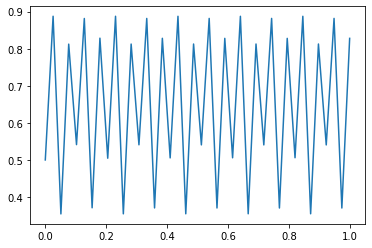

In [3]:
import math
mu = 3.55
plt.plot(t,recPlot(un,t,0.5))

#### QUESTION 11

Que se passe-t-il lorsque $\mu>3.57$ ? Observer particulièrement le cas $\mu=3.8$. Comparer le comportement de la suite pour différentes valeurs de la donnée initiale.


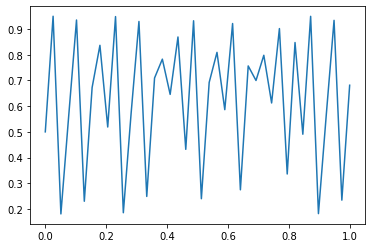

In [4]:
import math
mu = 3.8
plt.plot(t,recPlot(un,t,0.5))

C'est chaotique

In [5]:
def un(mu):
    return lambda x: x*mu*(1-x)

In [21]:
def an(mu):
    return lambda x: -mu*abs(0.5-x)

In [57]:
def sn(mu):
    return lambda x: mu*np.exp(-abs(1-x)**2)

In [7]:
def closeReal(a,b):
    return abs(a - b) < 0.05

In [8]:
def closeInt(a,b,threshold):
    return abs(a - b) < threshold

In [9]:
def topVals(t,sampleSize):
    maxVal = 0
    for keyVal in t:
        if maxVal < keyVal[1]:
            maxVal = keyVal[1]
    res = []
    for keyVal in t:
        if closeInt(keyVal[1],maxVal,sampleSize/4):
            res.append(keyVal[0])
    return res

In [67]:
def getTheMostImportantMeans(un,rValue,t):
    tab = recPlot(un(rValue),t,0.5)
    valOccurenceNumber = []
    for val in tab:
        hasAdded = False
        idx = -1
        for recordedVal in valOccurenceNumber:
            idx += 1
            if (closeReal(recordedVal[0],val)):
                valOccurenceNumber[idx][1] += 1
                valOccurenceNumber[idx][0] = (valOccurenceNumber[idx][0] + val)*0.1
                hasAdded = True
                break
        if (not hasAdded):
            valOccurenceNumber.append([val,1])
    return topVals(valOccurenceNumber,len(t))

In [11]:
mu = 0.1
getTheMostImportantMeans(un,mu,t)

[1.0202842343653709e-13]

In [12]:
def generateBifurcationDiagram(un,rValues):
    t = np.linspace(0,1,40)
    return [getTheMostImportantMeans(un,r,t) for r in rValues]
        

In [13]:
generateBifurcationDiagram(sn,np.linspace(0,2,10))

[[0.0],
 [4.97049462008061e-15],
 [3.934852140592709e-14],
 [1.3110425796698744e-13],
 [3.0789302576693203e-13],
 [9.436196195984725e-14],
 [3.04468721061797e-13],
 [8.000885270825761e-13],
 [5.881174223710617e-13],
 [5.193550756689223e-13]]

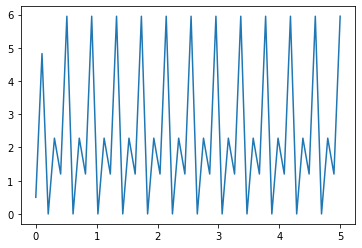

In [77]:
t =np.linspace(0,5,50)
mu=3.5
plt.plot(t,recPlot(sn(6.2),t,0.5))

In [76]:
def genForPlotting(un,rValues):
    tab = generateBifurcationDiagram(un,rValues)
    rValsForPlt = []
    unForPlt = []
    idx = 0
    for r in rValues:
        for val in tab[idx]:
            rValsForPlt.append(r)
            unForPlt.append(val)
        idx+=1
    return rValsForPlt,unForPlt

In [72]:
rValues = 15*np.arange(0,1,0.0005)
forPlot = genForPlotting(sn,rValues)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


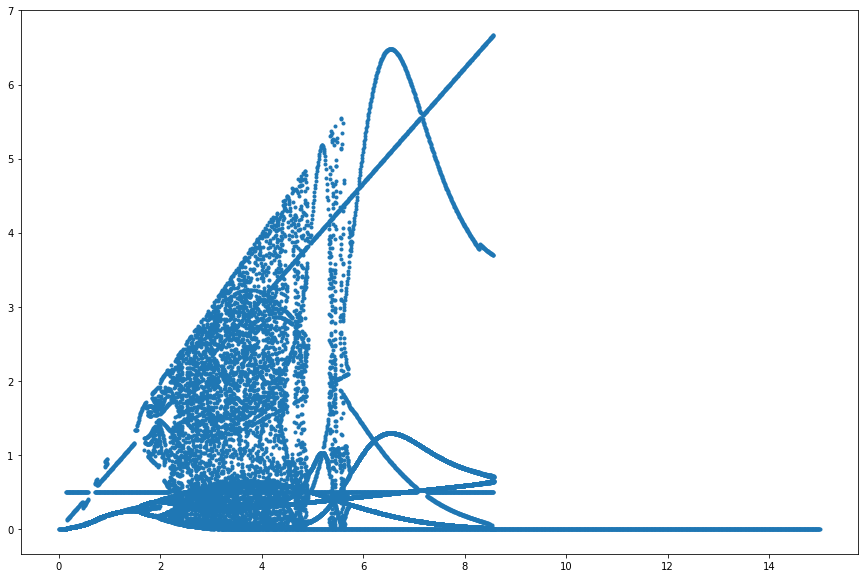

In [73]:
fig,ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(forPlot[0],forPlot[1],'.')
fig.show()